# Laboratiorio 06: Clasificación Logística 

## Dayana Andrea Henao Arbeláez 

In [423]:
from sklearn import datasets
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit

# Tomar el [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) desde sklearn:

```
from sklearn import datasets

iris = datasets.load_iris()
```
- Realizar la clasifición de las tres clases  a traves de una regresión logística  y realizar multiclasicación, para ello considere lo siguiente:

Si en un dataset existen más de 2 clases, $y={0, 1, 2, 3, ...}$ se debe construir una multiclasificación, una contra todos, la estrategia sugerida es la siguiente.

Sea A, B, C las tres clases. Para estos valores definir:

1. Definir la clase A como la clase 0 y todas las otras B, C como la clase 1
2. Encontrar el valor $h_\theta(X) = P(y=A|x;\theta)$
3. Definir la clase B como la clase 0 y todas las otras A, C como la clase 1
4. Encontrar el valor $h_\theta(X) = P(y=B|x;\theta)$
5. Definir la clase C como la clase 0 y todas las otras A, B como la clase 1
6. Encontrar el valor $h_\theta(X) = P(y=C|x;\theta)$

In [424]:
iris=datasets.load_iris()


Estrategia de solución. 

1. Para tener una vision general de los datos analiza lo que contiene la clave DESCR del dataset
```
print(iris.DESCR)
```

In [425]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

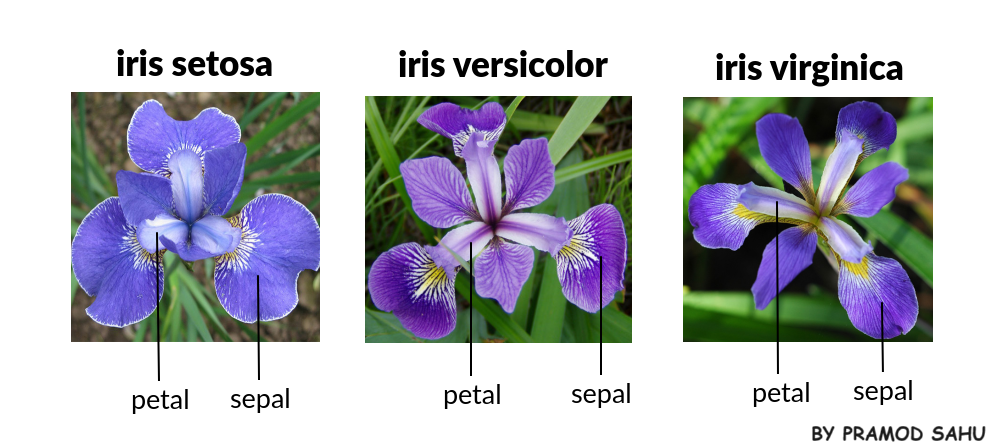

2. Construye un dataframe: 
- los datos se pueden encontrar con la clave "data".
- los nombres de las caracteristicas con la clave: "names_features"
- La clave target nos permite indentificar el tipo de datos.

In [426]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [427]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [428]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [429]:
data=pd.DataFrame(data=iris.data,columns=iris.feature_names)
data['target']=iris.target
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2



3. Cambia el nombre de las columnas del dataframe, empleando intrucción como:
```
columns_name =[ "".join([c.capitalize() for c in cols.split()])  for cols in df.columns ]
columns_name =[col.replace("(" ,"_") for col in columns_name ] 
cols = [col.replace(")" ,"") for col in columns_name ] 
```


In [430]:
columns_name =[ "".join([c.capitalize() for c in cols.split()])  for cols in data.columns ]
columns_name =[col.replace("(" ,"_") for col in columns_name ] 
cols = [col.replace(")" ,"") for col in columns_name ]

data.columns=cols
data

,SepalLength_cm,SepalWidth_cm,PetalLength_cm,PetalWidth_cm,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


4. Analizar el dataframe, numeros de datos, cantidad de null, descripción del dataframe.

In [431]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SepalLength_cm  150 non-null    float64
 1   SepalWidth_cm   150 non-null    float64
 2   PetalLength_cm  150 non-null    float64
 3   PetalWidth_cm   150 non-null    float64
 4   Target          150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [432]:
data.describe()

,SepalLength_cm,SepalWidth_cm,PetalLength_cm,PetalWidth_cm,Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [433]:
data.isnull().sum()

SepalLength_cm    0
SepalWidth_cm     0
PetalLength_cm    0
PetalWidth_cm     0
Target            0
dtype: int64

5. Aplica estadística básica y construye graficas para entender el dataset. Encuentra la matriz de correlacion

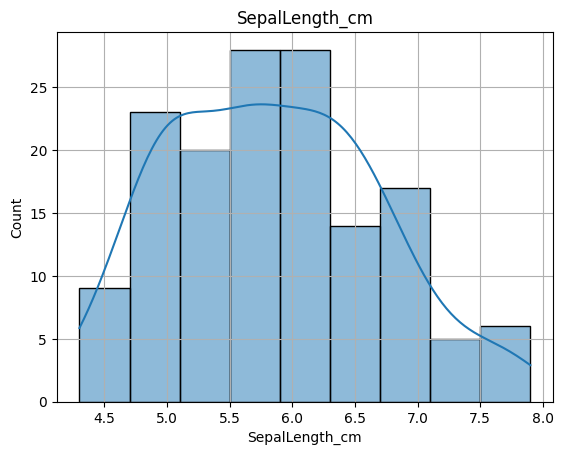

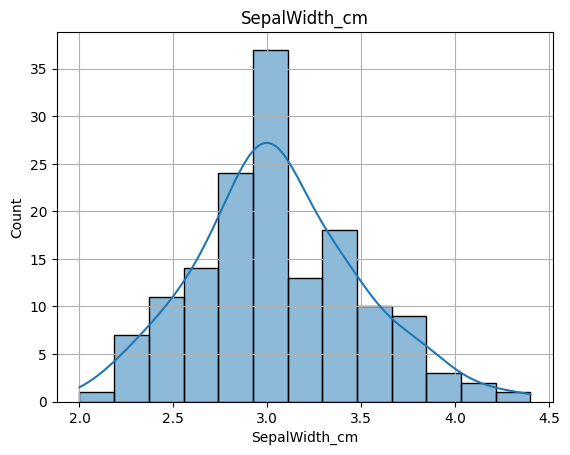

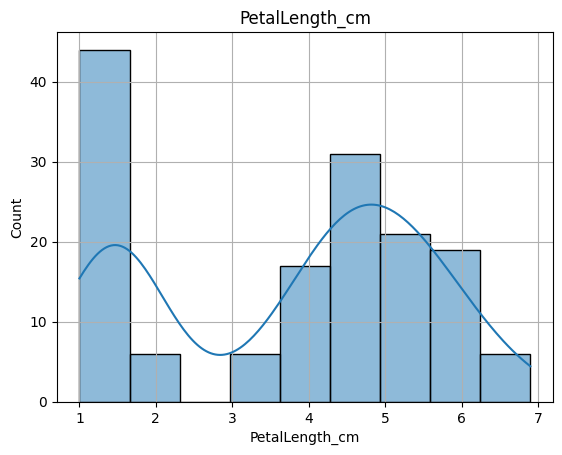

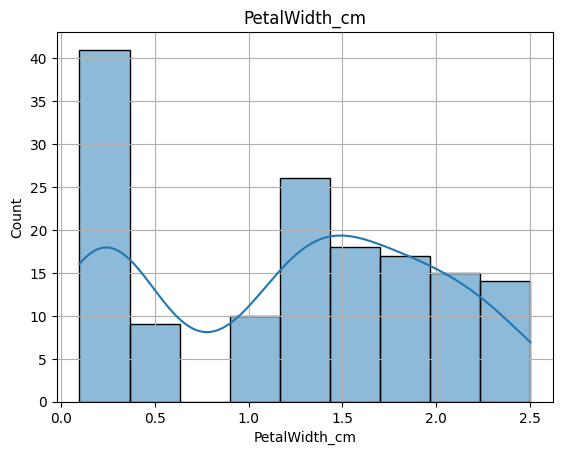

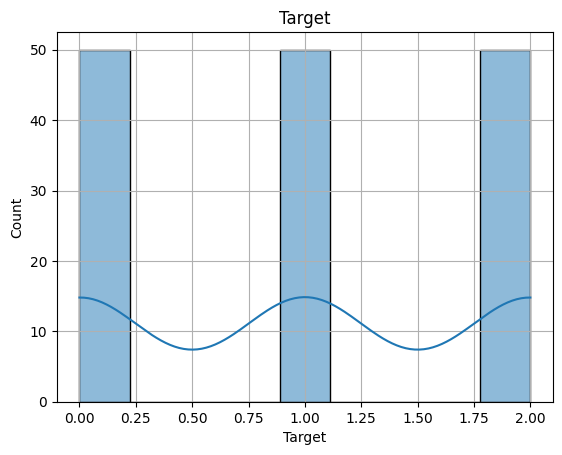

In [434]:
for i in data.columns:
    sns.histplot(data[i], kde=True)
    plt.title(i)
    plt.grid()
    plt.show()

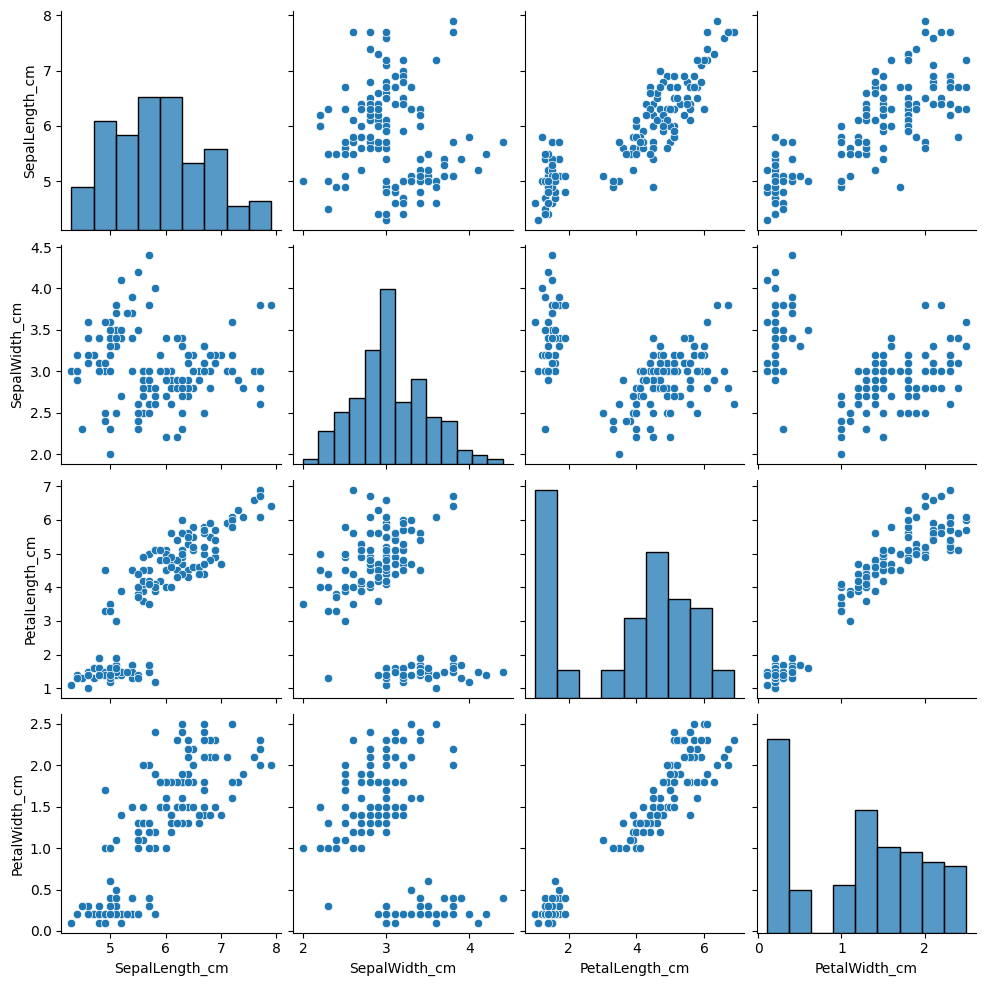

In [435]:
sns.pairplot(data.drop(columns='Target'), diag_kind="hist")

**Estimación de densidad por núcleo (KDE)**

Este gráfico representa de manera suave la distribución de cada clase de flores, permitiendo observar los solapamientos y diferencias entre especies. Es útil para identificar qué características discriminan mejor las clases.

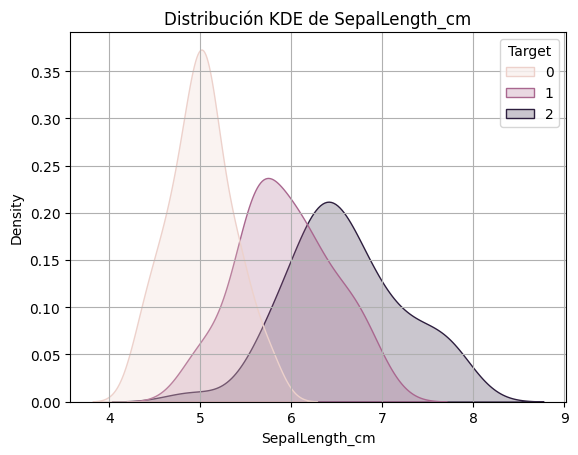

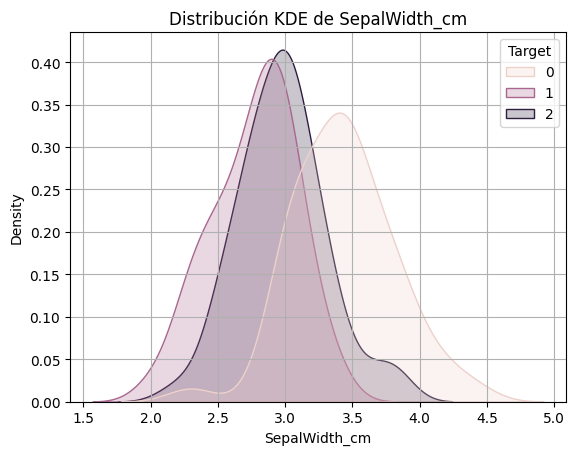

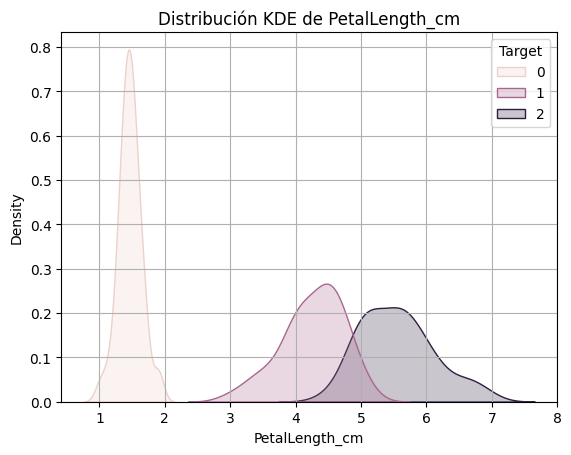

In [436]:
for i in data.columns[0:3]:
    plt.figure()
    sns.kdeplot(data=data, x=i, hue='Target', fill=True)
    plt.title(f'Distribución KDE de {i}')
    plt.grid(True) 
    plt.show()

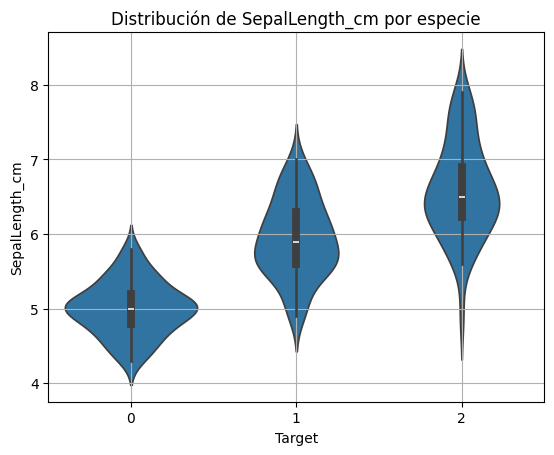

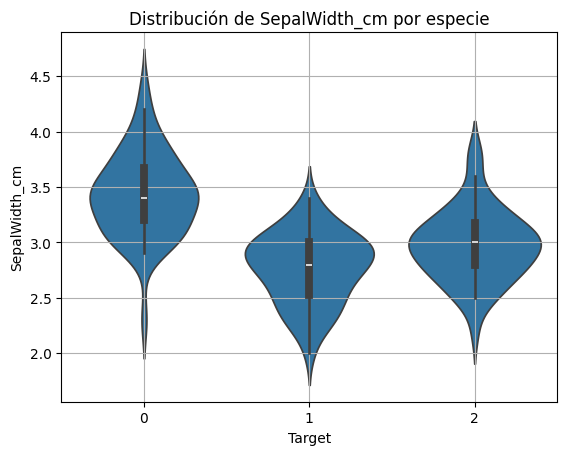

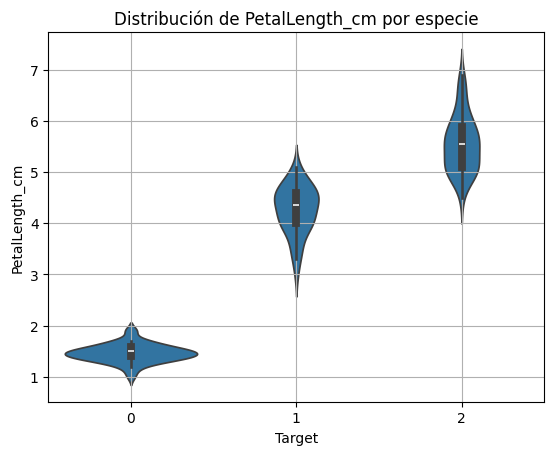

In [437]:
for i in data.columns[0:3]:
    sns.violinplot(data=data, x='Target', y=i, inner='box')
    plt.title(f"Distribución de {i} por especie")
    plt.grid(True)
    plt.show()

6. Encontrar la matrix de correlacion, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.

                SepalLength_cm  SepalWidth_cm  PetalLength_cm  PetalWidth_cm  \
SepalLength_cm        1.000000      -0.117570        0.871754       0.817941   
SepalWidth_cm        -0.117570       1.000000       -0.428440      -0.366126   
PetalLength_cm        0.871754      -0.428440        1.000000       0.962865   
PetalWidth_cm         0.817941      -0.366126        0.962865       1.000000   
Target                0.782561      -0.426658        0.949035       0.956547   

                  Target  
SepalLength_cm  0.782561  
SepalWidth_cm  -0.426658  
PetalLength_cm  0.949035  
PetalWidth_cm   0.956547  
Target          1.000000  


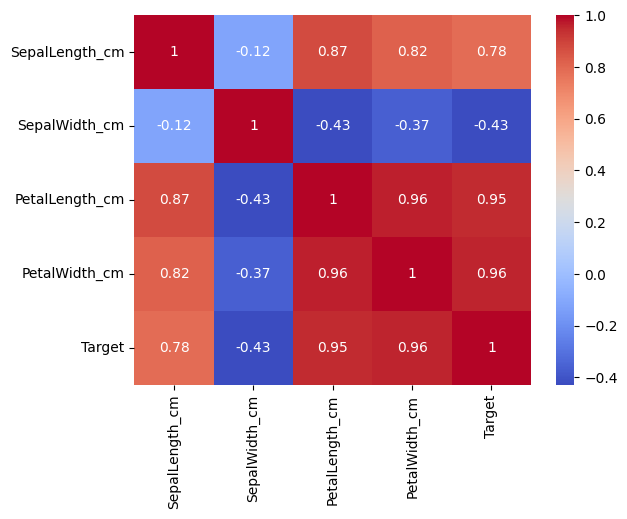

In [438]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
print(data.corr())

Ayudas para mejorar las metricas: 


- Normalizar cada columna respecto a su media y desviacion estandar

```
(x-mean(x))/std(x)
```

- Determinar los datos outlier 

In [439]:
from sklearn.preprocessing import StandardScaler

data=pd.DataFrame(data=StandardScaler().fit_transform(iris.data),columns=iris.feature_names)

data['target']=iris.target
data


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,2
146,0.553333,-1.282963,0.705921,0.922303,2
147,0.795669,-0.131979,0.819596,1.053935,2
148,0.432165,0.788808,0.933271,1.448832,2


In [440]:
columns_name =[ "".join([c.capitalize() for c in cols.split()])  for cols in data.columns ]
columns_name =[col.replace("(" ,"_") for col in columns_name ] 
cols = [col.replace(")" ,"") for col in columns_name ]

data.columns=cols
data

,SepalLength_cm,SepalWidth_cm,PetalLength_cm,PetalWidth_cm,Target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,2
146,0.553333,-1.282963,0.705921,0.922303,2
147,0.795669,-0.131979,0.819596,1.053935,2
148,0.432165,0.788808,0.933271,1.448832,2


## Para determinar los outliers 

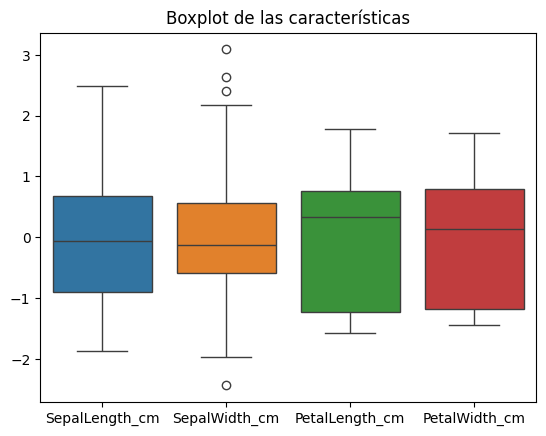

In [441]:
sns.boxplot(data=data.drop(columns=['Target']))
plt.title("Boxplot de las características")
plt.show()

Sólo hay outliers en la característica Sepal Width. 

In [442]:
Q1=data['SepalWidth_cm'].quantile(0.25)
Q3=data['SepalWidth_cm'].quantile(0.75)
IQR=Q3-Q1
outliers=data[(data['SepalWidth_cm'] < Q1 - 1.5 * IQR) | (data['SepalWidth_cm'] > Q3 + 1.5 * IQR)]
outliers['SepalWidth_cm']

15    3.090775
32    2.400185
33    2.630382
60   -2.433947
Name: SepalWidth_cm, dtype: float64

7. Separar los datos en datos de entramiento y test, prueba la siguiente instruccion:
```
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["Target"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]
```
¿Cómo se estan seprando los datos?

In [443]:
# División estratificada del dataset:
# Se usa StratifiedShuffleSplit para separar los datos en entrenamiento (80%) y prueba (20%)
# manteniendo la misma proporción de clases en la columna "Target".
# Esto garantiza que ambos conjuntos representen bien la distribución original.

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(data, data["Target"]):
  strat_train_set = data.loc[train_index]
  strat_test_set = data.loc[test_index]


In [444]:
strat_train_set

,SepalLength_cm,SepalWidth_cm,PetalLength_cm,PetalWidth_cm,Target
8,-1.748856,-0.362176,-1.340227,-1.315444,0
106,-1.143017,-1.282963,0.421734,0.659038,2
76,1.159173,-0.592373,0.592246,0.264142,1
9,-1.143017,0.098217,-1.283389,-1.447076,0
89,-0.416010,-1.282963,0.137547,0.132510,1
...,...,...,...,...,...
37,-1.143017,1.249201,-1.340227,-1.447076,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
33,-0.416010,2.630382,-1.340227,-1.315444,0
52,1.280340,0.098217,0.649083,0.395774,1


In [445]:
strat_test_set

,SepalLength_cm,SepalWidth_cm,PetalLength_cm,PetalWidth_cm,Target
38,-1.748856,-0.131979,-1.397064,-1.315444,0
127,0.310998,-0.131979,0.649083,0.790671,2
57,-1.143017,-1.513160,-0.260315,-0.262387,1
93,-1.021849,-1.743357,-0.260315,-0.262387,1
42,-1.748856,0.328414,-1.397064,-1.315444,0
56,0.553333,0.558611,0.535409,0.527406,1
22,-1.506521,1.249201,-1.567576,-1.315444,0
20,-0.537178,0.788808,-1.169714,-1.315444,0
147,0.795669,-0.131979,0.819596,1.053935,2
84,-0.537178,-0.131979,0.421734,0.395774,1


8. Construye un modelo empleando una regresión logística, para clasificar la clase setosa y no setosa, emplea la libreria sklearn.


In [446]:
strat_train_set.drop("Target", axis=1)

,SepalLength_cm,SepalWidth_cm,PetalLength_cm,PetalWidth_cm
8,-1.748856,-0.362176,-1.340227,-1.315444
106,-1.143017,-1.282963,0.421734,0.659038
76,1.159173,-0.592373,0.592246,0.264142
9,-1.143017,0.098217,-1.283389,-1.447076
89,-0.416010,-1.282963,0.137547,0.132510
...,...,...,...,...
37,-1.143017,1.249201,-1.340227,-1.447076
2,-1.385353,0.328414,-1.397064,-1.315444
33,-0.416010,2.630382,-1.340227,-1.315444
52,1.280340,0.098217,0.649083,0.395774


In [447]:
X_train=strat_train_set.drop("Target", axis=1)
y=strat_train_set["Target"]

# Compara cada elemento de y con 0, si es distinto de cero devuelve un True y lo asigna como un 1
y_train = (y != 0).astype(int)

In [448]:
modelo=sklearn.linear_model.LogisticRegression()

modelo.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [449]:
X_test=strat_test_set.drop("Target", axis=1)
y=strat_test_set["Target"]
y_test = (y != 0).astype(int)


In [450]:
y_pred = modelo.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0])

In [451]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Matriz de confusión:
 [[10  0]
 [ 0 20]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        20

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



9. Determine  la frontera de clasificación: 
```
X_new = np.linspace(-10, 10, 1000).reshape(-1, 1)#Generamos los valores de X_new
prob = log_reg.predict_proba(X_new)

decision_boundary = X_new[prob[:, 0] >= 0.5][0]
decision_boundary
```

In [452]:
X_ = X_train[["PetalWidth_cm"]].values
y_ = y_train==0

log_reg = modelo
log_reg.fit(X_, y_)

X_new = np.linspace(-10, 10, 1000).reshape(-1, 1)
prob = log_reg.predict_proba(X_new)

decision_boundary = X_new[prob[:, 0] >= 0.5][0]
decision_boundary

array([-0.57057057])


10. Encontrar una gráfica de la regresión logística  con los valores de probabilidad

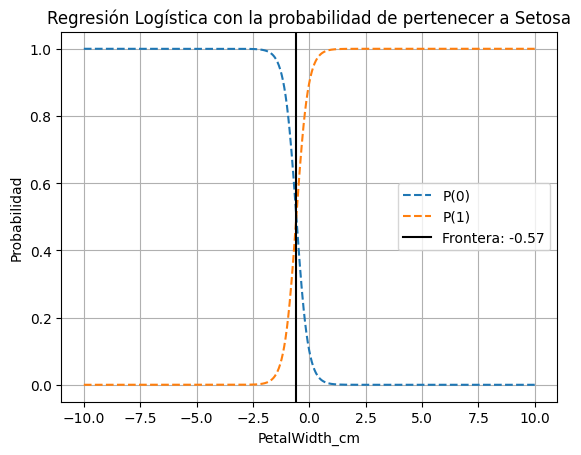

In [453]:
plt.plot(X_new, prob[:, 1], "--", label="P(0)")
plt.plot(X_new, prob[:, 0], "--", label="P(1)")
plt.axvline(x=decision_boundary, color="k", linestyle="-", label=f"Frontera: {decision_boundary[0]:.2f}")
plt.xlabel("PetalWidth_cm")
plt.ylabel("Probabilidad")
plt.title("Regresión Logística con la probabilidad de pertenecer a Setosa")
plt.legend()
plt.grid(True)
plt.show()

11. Construye el multiclasificador. Puede emplear los metodos dentro de logistic regresión.

In [454]:
X_train=strat_train_set.drop("Target", axis=1)
y_train=strat_train_set["Target"]

In [455]:
modelo=sklearn.linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

modelo.fit(X_train,y_train)

/home/dayana-henao/Escritorio/Aprendizaje_Estadistico/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'multinomial'


In [456]:
X_test=strat_test_set.drop("Target", axis=1)
y_test=strat_test_set["Target"]

In [457]:
y_pred = modelo.predict(X_test)
y_pred


array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       1, 1, 2, 2, 1, 0, 2, 0])

In [458]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 0.9333333333333333
Matriz de confusión:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



El modelo tiene una precisión del 93%. De 30 datos del dataset de validación, clasificó bien 28 y se equivocó sólo en 2. 

### Curvas de aprendizaje

/home/dayana-henao/Escritorio/Aprendizaje_Estadistico/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/dayana-henao/Escritorio/Aprendizaje_Estadistico/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/dayana-henao/Escritorio/Aprendizaje_Estadistico/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/

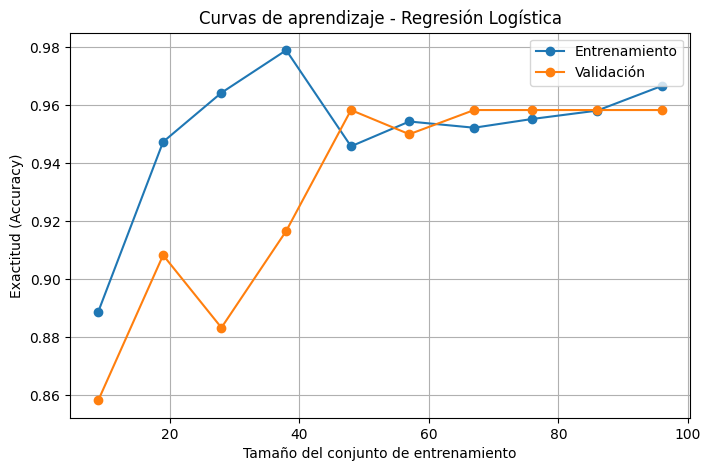

In [459]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(modelo, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy', random_state=42)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_mean, 'o-', label='Entrenamiento')
plt.plot(train_sizes, val_mean, 'o-', label='Validación')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Exactitud (Accuracy)')
plt.title('Curvas de aprendizaje - Regresión Logística')
plt.legend()
plt.grid(True)
plt.show()

12. Dado X = [4.9,5.0, 1.8, 0.3] asociados a todas las caracteristicas, ¿cuál es la probabilidad de que la flor sea setosa, versicolor o virginica? 

In [460]:
dato=np.array([4.9, 5.0, 1.8, 0.3])

dato=dato-dato.mean()/dato.std()

dato

array([ 3.41568791,  3.51568791,  0.31568791, -1.18431209])

In [461]:
dato.reshape(-1,1)

array([[ 3.41568791],
       [ 3.51568791],
       [ 0.31568791],
       [-1.18431209]])

In [462]:
modelo.predict(dato.reshape(1,-1))

/home/dayana-henao/Escritorio/Aprendizaje_Estadistico/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

La etiqueta 1 corresponde a la flor Iris-Versicolour


# Reto, no es obligatorio.

### Clasificación de pulsar.

Para el siguiente  dataset descrito en el este enlace [pulsar](https://archive.ics.uci.edu/ml/datasets/HTRU2)  , construir un clasificador logístico, para ello, deberá primera entender las caracteristicas del problema y seguidamente estudiar el comportamiento de la clasificacion realizada.


1. Dividir los datos en train and test
2. Entrenar el algoritmo.
3. Analizar las curvas de aprendizaje.
4. Realizar Predicciones
5. Aplicar regularización.

In [463]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
htru2 = fetch_ucirepo(id=372) 
  
# data (as pandas dataframes) 
X = htru2.data.features 
y = htru2.data.targets 

| Variable | Nombre               | Qué mide                                                               |
| -------- | -------------------- | ---------------------------------------------------------------------- |
| 1        | **Profile_mean**     | Media del perfil integrado (averaged pulse profile)                    |
| 2        | **Profile_stdev**    | Desviación estándar del perfil integrado                               |
| 3        | **Profile_skewness** | Sesgo (skewness) del perfil integrado                                  |
| 4        | **Profile_kurtosis** | Curtosis (kurtosis) del perfil integrado                               |
| 5        | **DM_mean**          | Media de la curva DM‑SNR (Dispersion Measure vs Signal‑to‑Noise Ratio) |
| 6        | **DM_stdev**         | Desviación estándar de la curva DM‑SNR                                 |
| 7        | **DM_skewness**      | Sesgo de la curva DM‑SNR                                               |
| 8        | **DM_kurtosis**      | Curtosis de la curva DM‑SNR                                            |

class o “Target”: 0 = no pulsar, 1 = pulsar.

In [464]:
X

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306
...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910


In [465]:
y

,class
0,0
1,0
2,0
3,0
4,0
...,...
17893,0
17894,0
17895,0
17896,0


In [466]:
X.describe()

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837


In [467]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Profile_mean      17898 non-null  float64
 1   Profile_stdev     17898 non-null  float64
 2   Profile_skewness  17898 non-null  float64
 3   Profile_kurtosis  17898 non-null  float64
 4   DM_mean           17898 non-null  float64
 5   DM_stdev          17898 non-null  float64
 6   DM_skewness       17898 non-null  float64
 7   DM_kurtosis       17898 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


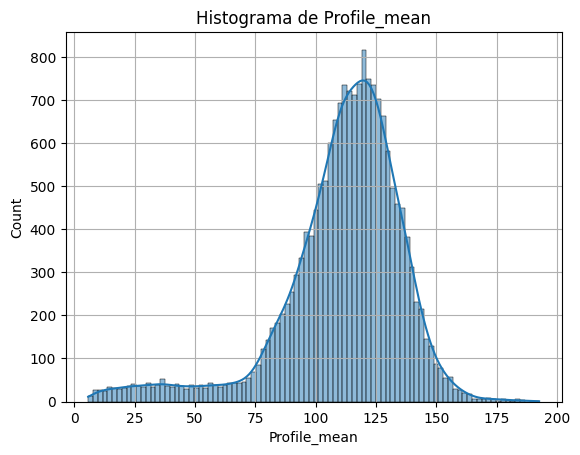

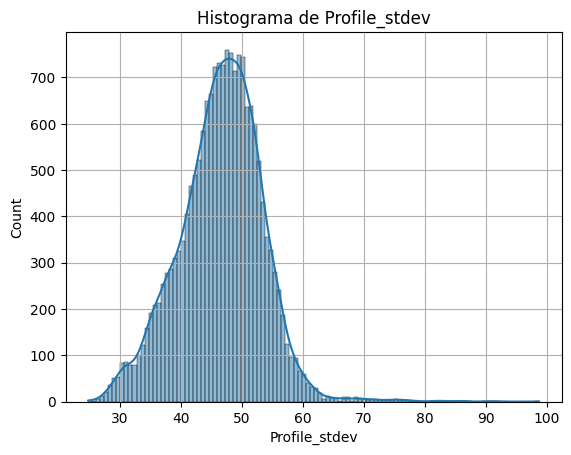

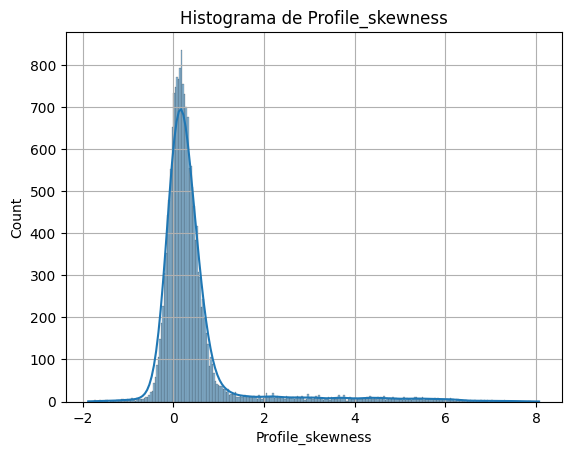

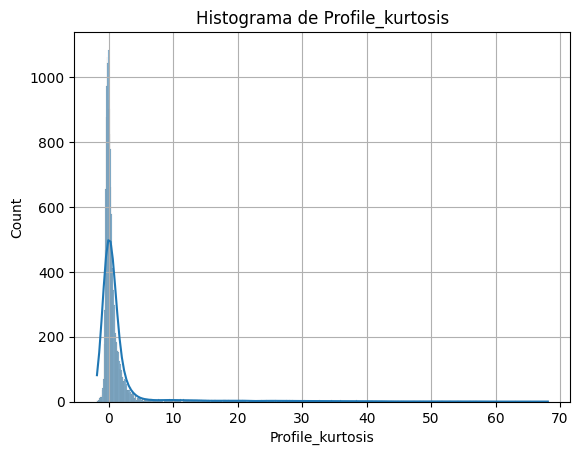

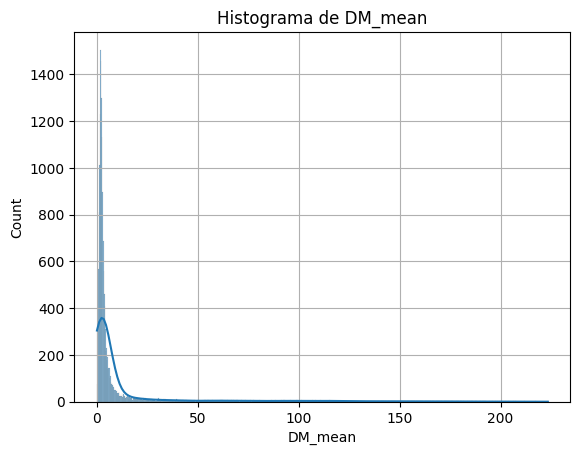

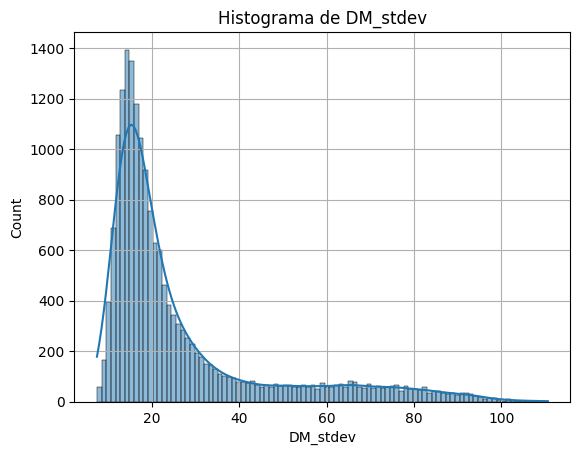

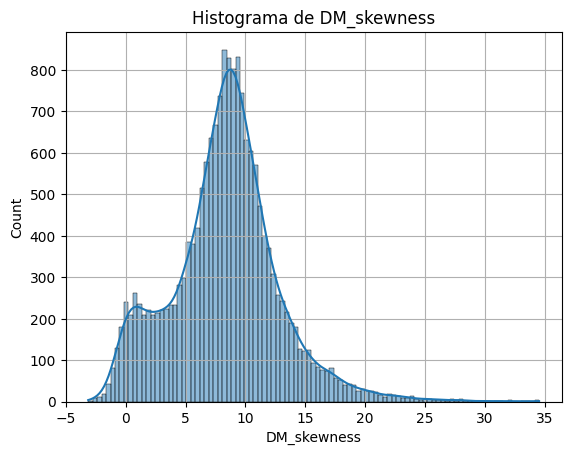

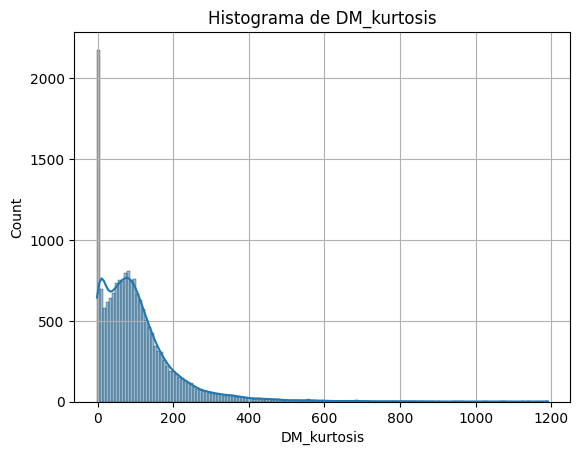

In [468]:
for i in X.columns:
    sns.histplot(X[i], kde=True)
    plt.title(f'Histograma de {i}')
    plt.grid()
    plt.show()

<Axes: >

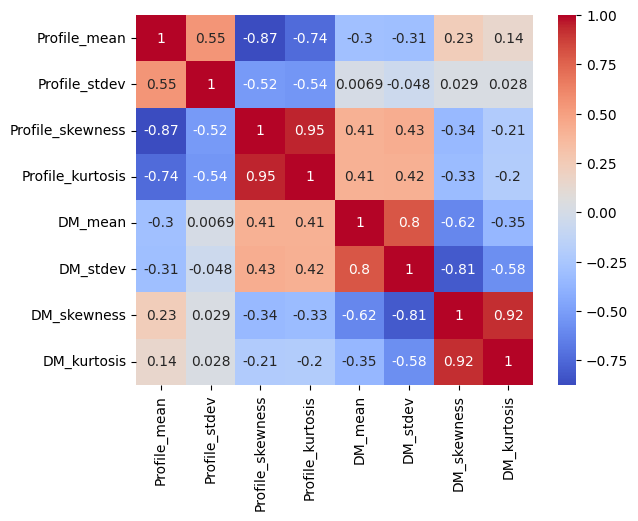

In [469]:
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')

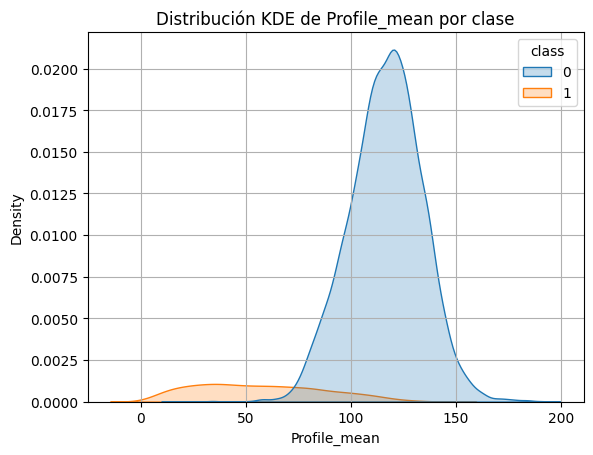

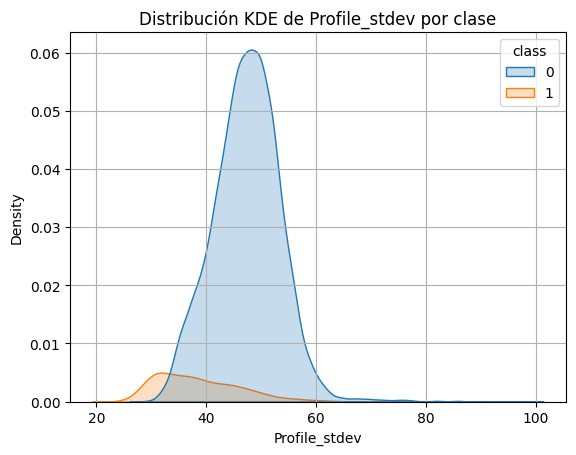

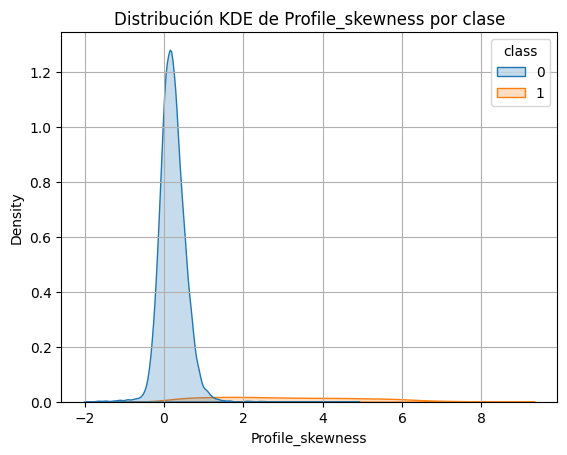

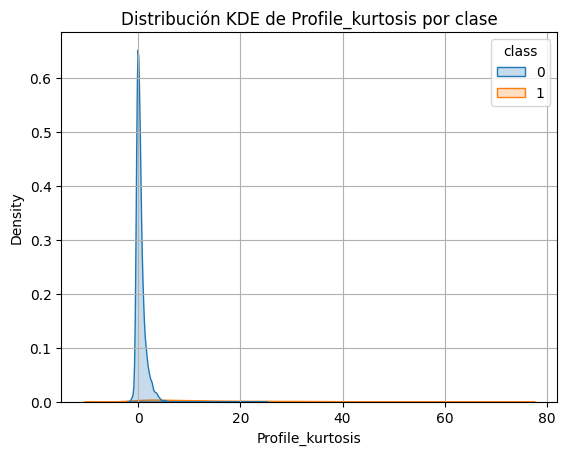

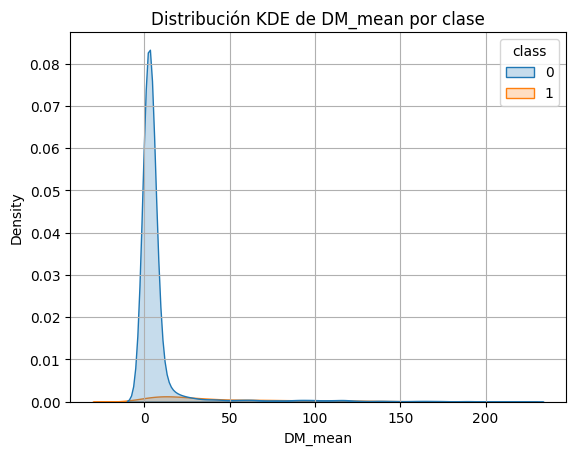

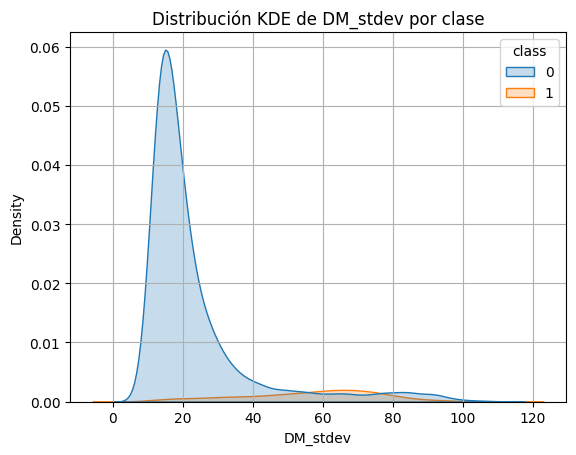

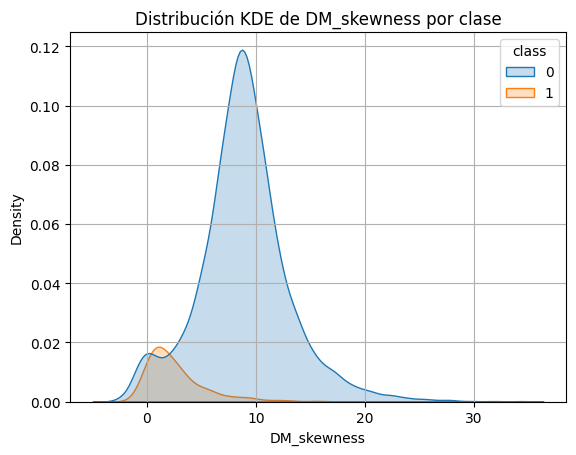

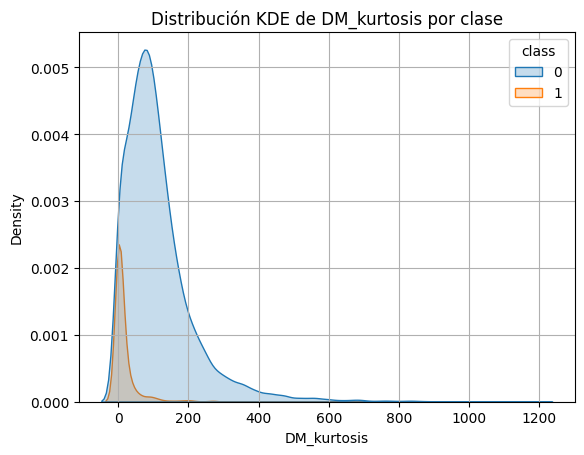

In [470]:
for i in X.columns:
    sns.kdeplot(data=X, x=i, hue=y.squeeze(), fill=True)
    plt.title(f"Distribución KDE de {i} por clase")
    plt.grid(True)
    plt.show()

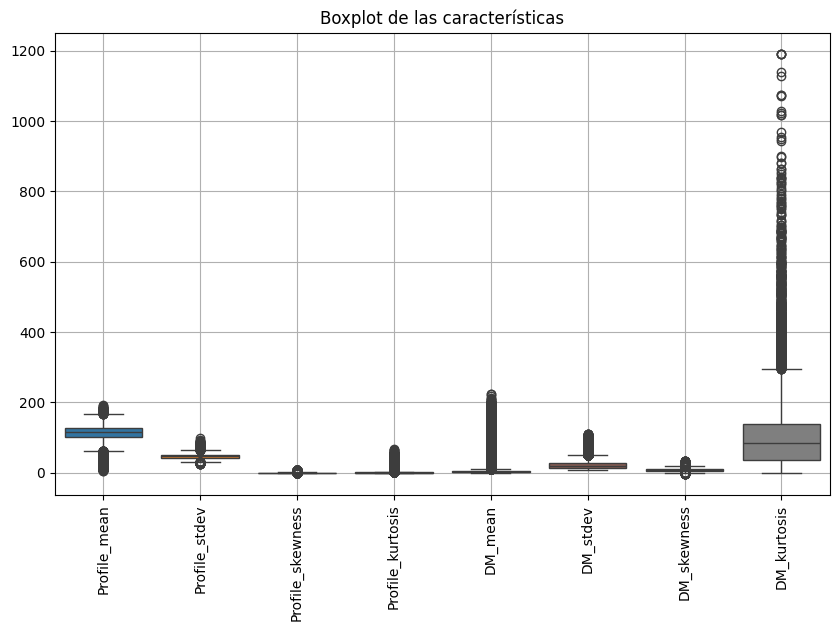

In [471]:
plt.figure(figsize=(10,6))
sns.boxplot(data=X)
plt.title("Boxplot de las características")
plt.xticks(rotation=90)  # rota las etiquetas 90 grados
plt.grid()
plt.show()

In [472]:
X.columns

Index(['Profile_mean', 'Profile_stdev', 'Profile_skewness', 'Profile_kurtosis',
       'DM_mean', 'DM_stdev', 'DM_skewness', 'DM_kurtosis'],
      dtype='object')

In [473]:
X_clean = X.copy()

for i in X.columns:
    Q1 = X_clean[i].quantile(0.25)
    Q3 = X_clean[i].quantile(0.75)
    IQR = Q3 - Q1

    mask = (X_clean[i] >= Q1 - 1.5 * IQR) & (X_clean[i] <= Q3 + 1.5 * IQR)
    X_clean = X_clean[mask]

X_clean

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306
...,...,...,...,...,...,...,...,...
17883,84.421875,41.775555,0.757467,1.107075,1.336120,12.026757,14.502863,258.119819
17884,106.875000,47.571328,0.199440,0.284964,3.079431,20.984455,8.427475,78.259366
17890,143.671875,45.302647,-0.045769,0.353643,5.173913,26.462345,5.706651,33.802613
17892,96.000000,44.193113,0.388674,0.281344,1.871237,15.833746,9.634927,104.821623


In [474]:
y_clean = y.loc[X_clean.index]

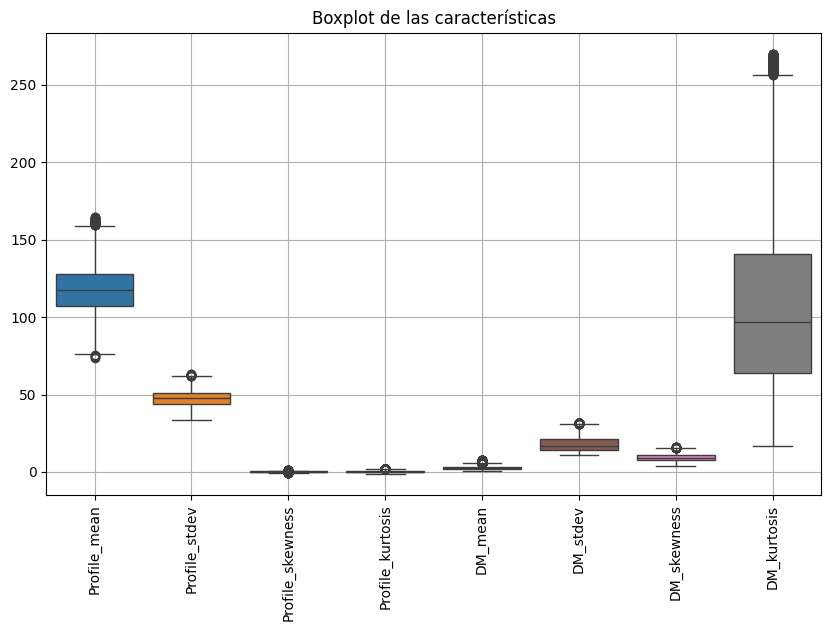

In [475]:
plt.figure(figsize=(10,6))
sns.boxplot(data=X_clean)
plt.title("Boxplot de las características")
plt.xticks(rotation=90)  # rota las etiquetas 90 grados
plt.grid()
plt.show()

In [476]:
scaler=StandardScaler()
X_scaled=pd.DataFrame(scaler.fit_transform(X_clean))
X_scaled.columns=X_clean.columns
X_scaled


,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis
0,1.517916,1.620887,-1.682613,-1.579979,0.318937,0.192604,-0.549533,-0.597706
1,-1.011070,2.262646,1.097288,-1.261934,-0.896947,-0.671097,0.576378,0.348189
2,-0.977322,-1.657907,0.533317,1.437121,0.256173,0.727910,-0.653299,-0.794716
3,1.264551,1.920769,-1.022653,-1.470707,0.672818,0.568311,-1.016629,-0.965173
4,-1.926925,-1.390948,1.635673,1.561759,-1.294897,-1.360270,2.175055,2.575811
...,...,...,...,...,...,...,...,...
11852,-2.213000,-1.169582,2.257678,1.533468,-1.169370,-1.246871,2.276043,2.674625
11853,-0.720841,-0.006750,0.041243,0.116761,0.222788,0.573427,-0.353894,-0.526216
11854,1.724555,-0.461926,-0.932704,0.235112,1.895380,1.686591,-1.531694,-1.317380
11855,-1.443557,-0.684537,0.792864,0.110522,-0.742041,-0.473251,0.168793,-0.053508


In [477]:
y_clean

,class
0,0
1,0
2,0
3,0
4,0
...,...
17883,0
17884,0
17890,0
17892,0


In [478]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(X_scaled, y_clean):
    X_train = X_scaled.iloc[train_index]
    X_test = X_scaled.iloc[test_index]
    y_train = y_clean.iloc[train_index]
    y_test = y_clean.iloc[test_index]

In [479]:
modelo=sklearn.linear_model.LogisticRegression()
modelo.fit(X_train, y_train)

/home/dayana-henao/Escritorio/Aprendizaje_Estadistico/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [480]:
y_predict=modelo.predict(X_test)
y_predict


array([0, 0, 0, ..., 0, 0, 0])

In [481]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_predict))
print("Reporte de clasificación:\n", classification_report(y_test, y_predict))

Accuracy: 0.9907251264755481
Matriz de confusión:
 [[2350    0]
 [  22    0]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2350
           1       0.00      0.00      0.00        22

    accuracy                           0.99      2372
   macro avg       0.50      0.50      0.50      2372
weighted avg       0.98      0.99      0.99      2372



/home/dayana-henao/Escritorio/Aprendizaje_Estadistico/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/dayana-henao/Escritorio/Aprendizaje_Estadistico/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/dayana-henao/Escritorio/Aprendizaje_Estadistico/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parame

/home/dayana-henao/Escritorio/Aprendizaje_Estadistico/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dayana-henao/Escritorio/Aprendizaje_Estadistico/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dayana-henao/Escritorio/Aprendizaje_Estadistico/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dayana-henao/Escritorio/Aprendizaje_Estadistico/venv/lib/pyth

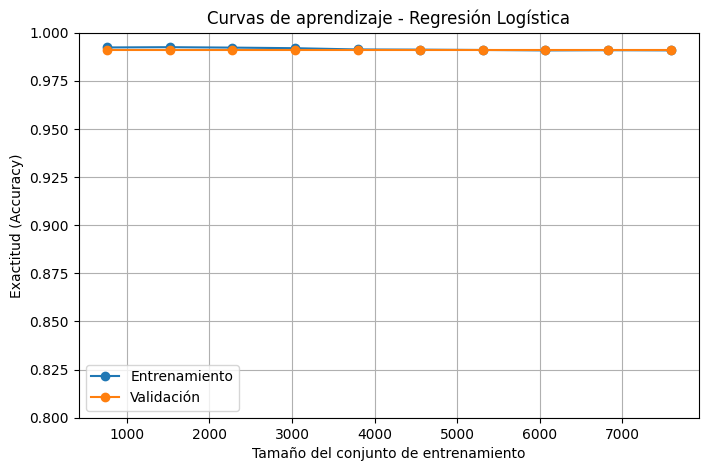

In [482]:
train_sizes, train_scores, val_scores = learning_curve(modelo, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy', random_state=42)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_mean, 'o-', label='Entrenamiento')
plt.plot(train_sizes, val_mean, 'o-', label='Validación')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Exactitud (Accuracy)')
plt.title('Curvas de aprendizaje - Regresión Logística')
plt.legend()
plt.grid(True)
plt.ylim(0.8, 1.0) 
plt.show()

## Referencias

[1] http://cs229.stanford.edu/syllabus.html

[2] https://www.coursera.org/learn/machine-learning. Week 3.

[3] https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py


[4]https://scikit-learn.org/stable/datasets/toy_dataset.html